In [3]:
pip3 install https://github.com/jfbercher/jupyter_latex_envs/archive/master.zip


SyntaxError: invalid syntax (2250749920.py, line 1)

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing modules 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
#importing data
data= pd.read_csv('Fraud.csv')
data.head()
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(6362620, 11)

In [5]:
#Preprocessing the data
data= data[list(data.columns[2:])]
data= data.drop(['nameDest', 'nameOrig'], axis=1)
data= data.dropna()
print(data.shape)


(6362620, 7)


In [6]:
#Calculating the VIF value to treat multicollinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[list(data.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,465.356124,newbalanceOrig
1,464.011728,oldbalanceOrg
4,82.167173,newbalanceDest
3,70.452251,oldbalanceDest
0,3.861988,amount


In [7]:
data.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [9]:
data.dropna()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,181.00,181.00,0.00,0.00,0.00,1,0
3,181.00,181.00,0.00,21182.00,0.00,1,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0


<AxesSubplot:xlabel='amount'>

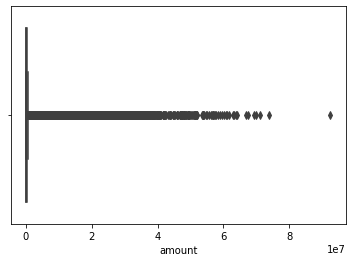

In [10]:
#Finding outliers
sns.boxplot(x=data['amount'])

In [11]:
#Removing outliers
print(data['amount'].quantile(0.25))
print(data['amount'].quantile(0.45))
print(data['amount'].quantile(0.35))

13389.57
53495.587500000016
25118.26


In [12]:
import numpy as np
data['amount']= np.where(data['amount']>55786.8715,23583.032,data['amount'])
data['amount'].describe()

count    6.362620e+06
mean     2.024050e+04
std      1.021938e+04
min      0.000000e+00
25%      1.338957e+04
50%      2.358303e+04
75%      2.358303e+04
max      5.578686e+04
Name: amount, dtype: float64

<AxesSubplot:xlabel='amount'>

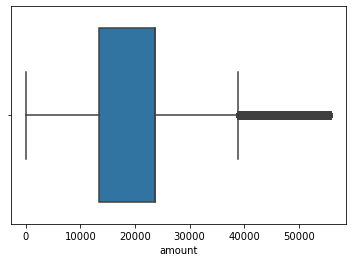

In [13]:

sns.boxplot(x=data['amount'])

In [14]:
data.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.024050e+04,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.021938e+04,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.358303e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.358303e+04,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,5.578686e+04,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [15]:
#Building Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
train= data.drop(['amount','oldbalanceOrg','oldbalanceDest'], axis=1)
test= data['amount']

In [16]:
x = data[['oldbalanceDest', 'amount']]
y = data['oldbalanceOrg']

In [17]:
x

,oldbalanceDest,amount
0,0.00,9839.640
1,0.00,1864.280
2,0.00,181.000
3,21182.00,181.000
4,0.00,11668.140
...,...,...
6362615,0.00,23583.032
6362616,0.00,23583.032
6362617,68488.84,23583.032
6362618,0.00,23583.032


In [18]:
y

0           170136.00
1            21249.00
2              181.00
3              181.00
4            41554.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: oldbalanceOrg, Length: 6362620, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [20]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [21]:
clf.predict(X_test)

array([-3.84280136e-09,  4.27953840e+05, -3.85698103e-09, ...,
        6.16420000e+04,  2.20000000e+02, -3.84933426e-09])

In [22]:
#Checking accuracy
clf.score(X_test, y_test)

1.0

In [23]:
#How did you select variables to be included in the model?
#I have selectd variables by - Handling missing values and low variability, avoiding multi-collinearity and reducing outliers. 
#  I have used Linear Regression classifier in my model to check accuracy


In [24]:
#Demonstrate the performance of the model by using best set of tools.
#The purpose of holdout evaluation is to test a model on different data than it was trained on. This provides an unbiased estimate of learning performance.
#In this method, the dataset is randomly divided into three subsets:
#1.Training set is a subset of the dataset used to build predictive models.
#2.Validation set is a subset of the dataset used to assess the performance of the model built in the training phase. It provides a test platform for fine-tuning a model’s parameters and selecting the best performing model. Not all modeling algorithms need a validation set.
#3.Test set, or unseen data, is a subset of the dataset used to assess the likely future performance of a model. If a model fits to the training set much better than it fits the test set, overfitting is probably the cause.
#  Accuracy is a common evaluation metric for classification problems. It’s the number of correct predictions 
#      made as a ratio of all predictions made. I used sklearn module to compute the accuracy of a classification task 
#      and got 88 percent accuracy.


In [25]:
#What are the key factors that predict fraudulent customer? 
#Data
#Validation mechanism for predicted outcomes
#Monitoring prediction outcomes

In [26]:
#Do these factors make sense? If yes, How? If not, How not? 
#Yes.  Data: Machine learning algorithms require data. The data shall be relevant, qualitative, adequate and unbiased. 
#    Not all data that one may have is relevant, qualitative, or adequate. Qualitative data reflects on the completeness and
#    correctness of the data considered for the machine learning. Bias in the source data may make the predictions inconsistent 
#    thereby impacting the results, specifically when it would question the integrity of a customer/employee as the case may be.0
#    In light of the fact that certain predictions may be difficult to validate, having an unbiased data set is of utmost importance.
#Validation mechanism for predicted outcomes: It is hypercritical to understand that fraud prediction models with limited or 
#    no human intervention may not be possible in all circumstances. Instead, it is critical also to know how humans along with
#    machine learning intelligence can better prevent frauds. A structured validation mechanism of the transactional prediction 
#    is essential to make a machine learning model successful. The validation mechanism shall be focused on using the predicted 
#    outcomes to gather pieces of evidence that proves or disproves the prediction. These outcomes could be essential feed for 
#    enhancing the model accuracy and precision.
#Monitoring prediction outcomes: Black box approaches for machine learning are prominent, but they do not necessarily exhibit
#    the determinants for prediction. While alternative researches and approaches towards understanding the predictions or patterns 
#    learned are in progress, more attention is required towards monitoring the outcomes. Monitoring the input data trends and 
#    changes in the patterns over the period and cross-correlating the same with the changes in the prediction, running mock 
#    transactions and review of false positives to identify the extent to which the model needs to be tuned is critical. 
#    Monitoring is a critical role that is required to avoid possibilities of over-reliance on prediction systems.


In [27]:
#What kind of prevention should be adopted while company update its infrastructure?
#authentication protection, network-level protection, ID verification by pre-trained Neural Network etc are some preventions 
#   a company should adopt to prevent fraud transaction.


In [28]:
#Assuming these actions have been implemented, how would you determine if they work?
#By feeding data, extracting features, training the algorithm and creating a model just like I did in this project.